# Ejercicio 1

Realice un programa que encuentre todas las raíces de una función en un intervalo cerrado bajo la suposición de que la función realiza oscilaciones y entre cada oscilación hay al menos una raíz. Ponga en práctica esta función y encuentre todas las raíces de la siguiente función en el intervalo $(0,2\pi)$:

$$
y(x)=\cos x+\frac{6}{5}\sin x^2
$$

In [46]:
from numpy import*
from pylab import*
%matplotlib inline 

In [79]:
def bi(f,x,h,err=1e-5):
    y=arange(x[0],x[1]+h,h)
    for i in range(len(y-1)):
        r = biparticion(f,y[i],y[i+1],err=1e-5)
        if r > x[1]:
            break
        print(r)

In [131]:
def bi2(f,x,h,err=1e-5):
    y=arange(x[0],x[1]+h,h)
    raices=[]
    for i in range(len(y-1)):
        raiz=0.5*(y[i]+y[i+1])
        f_i,f_f=f(y[i]),f(y[i+1])
        while abs(raiz-y[i+1]) >=err and abs(f_i-f_f)>=err:
            f_m=f(raiz)
            if f_m == 0.:
                break
            if f_m*f_i < 0:
                y[i+1]=raiz
            else:
                x[1]=raiz
            raices = raices+[raiz]
        if raiz > x[1]:
            break
    return raices

In [178]:
def g(x):
    return x*2

In [192]:
x=arange(-15,27+1,1)
y=[x[0]]
for i in xrange(len(x+1)):
    if g(x[i])*g(x[i+1]) <= 0:
        y=y+[x[i+1]]
    elif g(x[i])*g(x[i+1]) > 0:
        y=y
    print y

[-15]
[-15]
[-15]
[-15]
[-15]
[-15]
[-15]
[-15]
[-15]
[-15]
[-15]
[-15]
[-15]
[-15]
[-15, 0]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]
[-15, 0, 1]


IndexError: index out of bounds

In [122]:
def biparticion(f,x_i,x_d,err=1e-5):
    raiz=0.5*(x_i+x_d)
    y_i,y_d=f(x_i),f(x_d)
    while abs(raiz-x_d) >=err and abs(y_i-y_d)>=err:
        y_m=f(raiz)
        if y_m == 0.:
            break
        if y_m*y_i < 0:
            x_d=raiz
        else:
            return x_i
        raiz=0.5*(x_i+x_d)
        y_i,y_d=f(x_i),f(x_d)
    return raiz

Para probar que funcione bi:

In [106]:
def f1(x):
    return cos(x)+(6/5)*sin(x*x)

Sus raices serán:

In [133]:
bi2(f1,[0,2*pi],1)

KeyboardInterrupt: 

Entonces: la gráfica corta en :

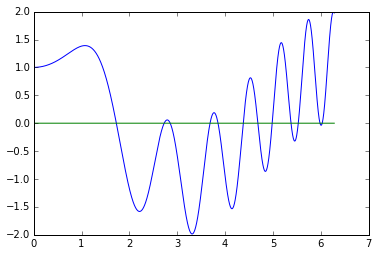

In [75]:
x=arange(0,2*pi+0.001,0.001)
plot(x,cos(x)+(6/5)*sin(x*x))
plot(x,0*x)
plot(0,)
show()

In [100]:
x=[0,4]
h=0.1
res=[]
y=arange(x[0],x[1]+h,h)
for i in range(len(y-1)):
    r = biparticion(f1,y[i],y[i+1],err=1e-5)
    res =+ r 
print res

IndexError: index out of bounds

In [116]:
x=[]
y=x+[4]
print y
y=y+[6]
print y
y=y+[6]
print y

[4]
[4, 6]
[4, 6, 6]


In [ ]:
def newton2(fun,d_fun,x_i,err=1e-300):
    while abs(fun(x_i)) >= err:
        raiz=x_i-fun(x_i)/d_fun(x_i)
        x_i = raiz
    return raiz